# This notebook is to perform the Exploratory Data Analysis.

First we have to import the necessary libraries.

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Next we have to merge the 2 datasets vertically after the column names have been added.

In [40]:
# create a list containing the column names
column_names= ["age","workclass","fnlwgt","education","education.num","marital.status","occupation","relationship","race","sex","capital.gain","capital.loss",
               "hours.per.week","native.country","income"]

# convert the .txt files to .csv
train = pd.read_csv('adult_data.txt', sep=",\s", header=None, names=column_names, engine='python') 
test = pd.read_csv('adult_test.txt', sep=",\s", header=None, names=column_names, engine='python')
test['income'].replace(regex=True,inplace=True,to_replace=r'\.',value=r'')

# merge the 2 data frames vertically
df = pd.concat([test,train])
df.reset_index(inplace=True, drop=True) # the index is reset
df

<>:6: SyntaxWarning: invalid escape sequence '\s'
<>:7: SyntaxWarning: invalid escape sequence '\s'
<>:6: SyntaxWarning: invalid escape sequence '\s'
<>:7: SyntaxWarning: invalid escape sequence '\s'
C:\Users\arkha\AppData\Local\Temp\ipykernel_15884\3589002969.py:6: SyntaxWarning: invalid escape sequence '\s'
  train = pd.read_csv('adult_data.txt', sep=",\s", header=None, names=column_names, engine='python')
C:\Users\arkha\AppData\Local\Temp\ipykernel_15884\3589002969.py:7: SyntaxWarning: invalid escape sequence '\s'
  test = pd.read_csv('adult_test.txt', sep=",\s", header=None, names=column_names, engine='python')
C:\Users\arkha\AppData\Local\Temp\ipykernel_15884\3589002969.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, w

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,|1x3 Cross validator,None,NaN,None,NaN,None,None,None,None,None,NaN,NaN,NaN,None,None
1,25,Private,226802.0,11th,7.0,Never-married,Machine-op-inspct,Own-child,Black,Male,0.0,0.0,40.0,United-States,<=50K
2,38,Private,89814.0,HS-grad,9.0,Married-civ-spouse,Farming-fishing,Husband,White,Male,0.0,0.0,50.0,United-States,<=50K
3,28,Local-gov,336951.0,Assoc-acdm,12.0,Married-civ-spouse,Protective-serv,Husband,White,Male,0.0,0.0,40.0,United-States,>50K
4,44,Private,160323.0,Some-college,10.0,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688.0,0.0,40.0,United-States,>50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48838,27,Private,257302.0,Assoc-acdm,12.0,Married-civ-spouse,Tech-support,Wife,White,Female,0.0,0.0,38.0,United-States,<=50K
48839,40,Private,154374.0,HS-grad,9.0,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0.0,0.0,40.0,United-States,>50K
48840,58,Private,151910.0,HS-grad,9.0,Widowed,Adm-clerical,Unmarried,White,Female,0.0,0.0,40.0,United-States,<=50K
48841,22,Private,201490.0,HS-grad,9.0,Never-married,Adm-clerical,Own-child,White,Male,0.0,0.0,20.0,United-States,<=50K


We can see that the 0th row has irrelevant values.

In [41]:
df = df.drop(index=0)
df = df.reset_index(drop=True)
df

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,25,Private,226802.0,11th,7.0,Never-married,Machine-op-inspct,Own-child,Black,Male,0.0,0.0,40.0,United-States,<=50K
1,38,Private,89814.0,HS-grad,9.0,Married-civ-spouse,Farming-fishing,Husband,White,Male,0.0,0.0,50.0,United-States,<=50K
2,28,Local-gov,336951.0,Assoc-acdm,12.0,Married-civ-spouse,Protective-serv,Husband,White,Male,0.0,0.0,40.0,United-States,>50K
3,44,Private,160323.0,Some-college,10.0,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688.0,0.0,40.0,United-States,>50K
4,18,?,103497.0,Some-college,10.0,Never-married,?,Own-child,White,Female,0.0,0.0,30.0,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302.0,Assoc-acdm,12.0,Married-civ-spouse,Tech-support,Wife,White,Female,0.0,0.0,38.0,United-States,<=50K
48838,40,Private,154374.0,HS-grad,9.0,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0.0,0.0,40.0,United-States,>50K
48839,58,Private,151910.0,HS-grad,9.0,Widowed,Adm-clerical,Unmarried,White,Female,0.0,0.0,40.0,United-States,<=50K
48840,22,Private,201490.0,HS-grad,9.0,Never-married,Adm-clerical,Own-child,White,Male,0.0,0.0,20.0,United-States,<=50K


Let us see the data type of each column in the dataset.

In [42]:
df.dtypes

age                object
workclass          object
fnlwgt            float64
education          object
education.num     float64
marital.status     object
occupation         object
relationship       object
race               object
sex                object
capital.gain      float64
capital.loss      float64
hours.per.week    float64
native.country     object
income             object
dtype: object

Next let us see the number of null values in each column.

In [43]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

Upon careful observation, it could be seen that though the code provides that there are no null values, some of the values have been filled with just "?".

Let us check which of these columns have the "?" in them. This could be done by checking the possible values in each categorical column.

In [44]:
from collections import Counter

workclass_vals = dict(Counter(df['workclass'])).keys()
nationality_vals = dict(Counter(df['native.country'])).keys()
education_vals = dict(Counter(df['education'])).keys()
maritial_status_vals = dict(Counter(df['marital.status'])).keys()
occupation_vals = dict(Counter(df['occupation'])).keys()
relationship_vals = dict(Counter(df['relationship'])).keys()
race_vals = dict(Counter(df['race'])).keys()
sex_vals = dict(Counter(df['sex'])).keys()

# printing all the values for each column
print("Workclass: ", list(workclass_vals), '\n')
print("Nationality: ", list(nationality_vals), '\n')
print("Education levels: ", list(education_vals), '\n')
print("Maritial Status: ", list(maritial_status_vals), '\n')
print("Occupation: ", list(occupation_vals), '\n')
print("Relationship: ", list(relationship_vals), '\n')
print("Race: ", list(race_vals), '\n')
print("Sex: ", list(sex_vals), '\n')

Workclass:  ['Private', 'Local-gov', '?', 'Self-emp-not-inc', 'Federal-gov', 'State-gov', 'Self-emp-inc', 'Without-pay', 'Never-worked'] 

Nationality:  ['United-States', '?', 'Peru', 'Guatemala', 'Mexico', 'Dominican-Republic', 'Ireland', 'Germany', 'Philippines', 'Thailand', 'Haiti', 'El-Salvador', 'Puerto-Rico', 'Vietnam', 'South', 'Columbia', 'Japan', 'India', 'Cambodia', 'Poland', 'Laos', 'England', 'Cuba', 'Taiwan', 'Italy', 'Canada', 'Portugal', 'China', 'Nicaragua', 'Honduras', 'Iran', 'Scotland', 'Jamaica', 'Ecuador', 'Yugoslavia', 'Hungary', 'Hong', 'Greece', 'Trinadad&Tobago', 'Outlying-US(Guam-USVI-etc)', 'France', 'Holand-Netherlands'] 

Education levels:  ['11th', 'HS-grad', 'Assoc-acdm', 'Some-college', '10th', 'Prof-school', '7th-8th', 'Bachelors', 'Masters', 'Doctorate', '5th-6th', 'Assoc-voc', '9th', '12th', '1st-4th', 'Preschool'] 

Maritial Status:  ['Never-married', 'Married-civ-spouse', 'Widowed', 'Divorced', 'Separated', 'Married-spouse-absent', 'Married-AF-spous

Let us see the balance of the dataset is for the 2 classes to see how these null values could be handled.

([<matplotlib.patches.Wedge at 0x193ece0aea0>,
 [Text(0.13270858417163964, -1.0919653985759616, '<=50K'),
  Text(-0.13270853305305033, 1.0919654047884977, '>50K')],
 [Text(0.07238650045725797, -0.5956174901323427, '76.1%'),
  Text(-0.07238647257439108, 0.5956174935209987, '23.9%')])

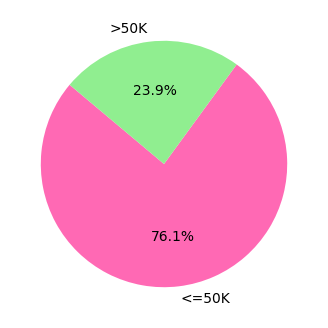

In [45]:
income_counts = df['income'].value_counts() # getting the number of occcurences for each unique value in the "income" column

# Define custom colors for the pie chart slices
custom_colors = ['hotpink', 'lightgreen']

# a pie chart is plotted to see for any imbalances in the output column
plt.figure(figsize=(4,4))
plt.pie(income_counts, labels=income_counts.index, autopct='%1.1f%%', startangle=140, colors=custom_colors)

This displays an imbalance in the dataset as there is 76.1% occurence of one category while the other category has an occurence of only 23.9%

Let us drop the rows which have a "?" in them.

In [46]:
df[df == '?'] = np.nan # dropping the rows with "?"
df = df.dropna(axis=0)
df

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,25,Private,226802.0,11th,7.0,Never-married,Machine-op-inspct,Own-child,Black,Male,0.0,0.0,40.0,United-States,<=50K
1,38,Private,89814.0,HS-grad,9.0,Married-civ-spouse,Farming-fishing,Husband,White,Male,0.0,0.0,50.0,United-States,<=50K
2,28,Local-gov,336951.0,Assoc-acdm,12.0,Married-civ-spouse,Protective-serv,Husband,White,Male,0.0,0.0,40.0,United-States,>50K
3,44,Private,160323.0,Some-college,10.0,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688.0,0.0,40.0,United-States,>50K
5,34,Private,198693.0,10th,6.0,Never-married,Other-service,Not-in-family,White,Male,0.0,0.0,30.0,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302.0,Assoc-acdm,12.0,Married-civ-spouse,Tech-support,Wife,White,Female,0.0,0.0,38.0,United-States,<=50K
48838,40,Private,154374.0,HS-grad,9.0,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0.0,0.0,40.0,United-States,>50K
48839,58,Private,151910.0,HS-grad,9.0,Widowed,Adm-clerical,Unmarried,White,Female,0.0,0.0,40.0,United-States,<=50K
48840,22,Private,201490.0,HS-grad,9.0,Never-married,Adm-clerical,Own-child,White,Male,0.0,0.0,20.0,United-States,<=50K


Next to analyze the distribution and make visualizations, a few plots could be drawn based on the dataset.

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13],
 [Text(0, 0, 'Machine-op-inspct'),
  Text(1, 0, 'Farming-fishing'),
  Text(2, 0, 'Protective-serv'),
  Text(3, 0, 'Other-service'),
  Text(4, 0, 'Prof-specialty'),
  Text(5, 0, 'Craft-repair'),
  Text(6, 0, 'Adm-clerical'),
  Text(7, 0, 'Exec-managerial'),
  Text(8, 0, 'Tech-support'),
  Text(9, 0, 'Sales'),
  Text(10, 0, 'Priv-house-serv'),
  Text(11, 0, 'Transport-moving'),
  Text(12, 0, 'Handlers-cleaners'),
  Text(13, 0, 'Armed-Forces')])

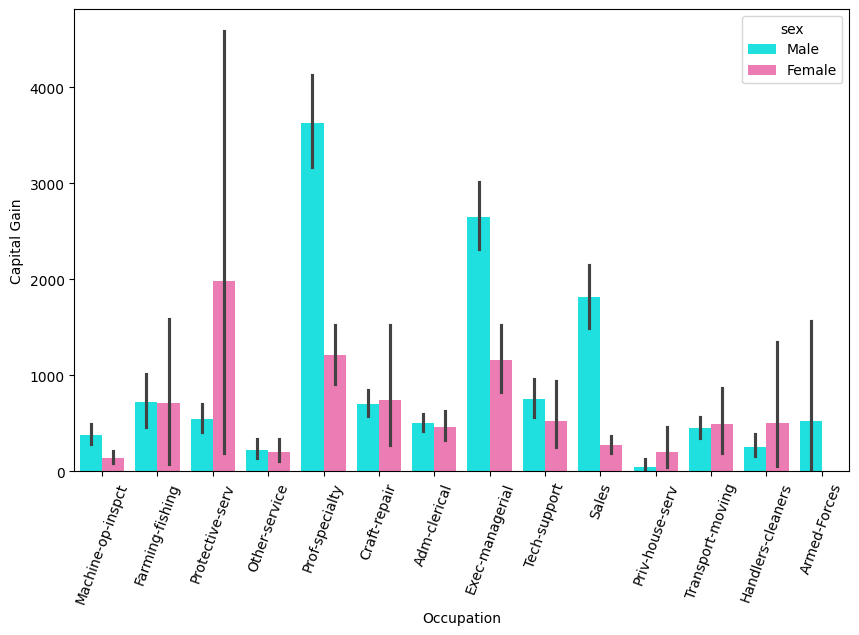

In [47]:
# plotting a figure to see the change of capital gain with the change in occupation for each sex.

# Define a custom color palette
color_palette = {"Male": "cyan", "Female": "hotpink"}
plt.figure(figsize=(10,6))
sns.barplot(x="occupation", y="capital.gain", data=df, hue="sex", palette=color_palette)
plt.xlabel("Occupation")
plt.ylabel("Capital Gain")
plt.xticks(rotation=70)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15],
 [Text(0, 0, '11th'),
  Text(1, 0, 'HS-grad'),
  Text(2, 0, 'Assoc-acdm'),
  Text(3, 0, 'Some-college'),
  Text(4, 0, '10th'),
  Text(5, 0, 'Prof-school'),
  Text(6, 0, '7th-8th'),
  Text(7, 0, 'Bachelors'),
  Text(8, 0, 'Masters'),
  Text(9, 0, '5th-6th'),
  Text(10, 0, 'Assoc-voc'),
  Text(11, 0, '9th'),
  Text(12, 0, 'Doctorate'),
  Text(13, 0, '12th'),
  Text(14, 0, '1st-4th'),
  Text(15, 0, 'Preschool')])

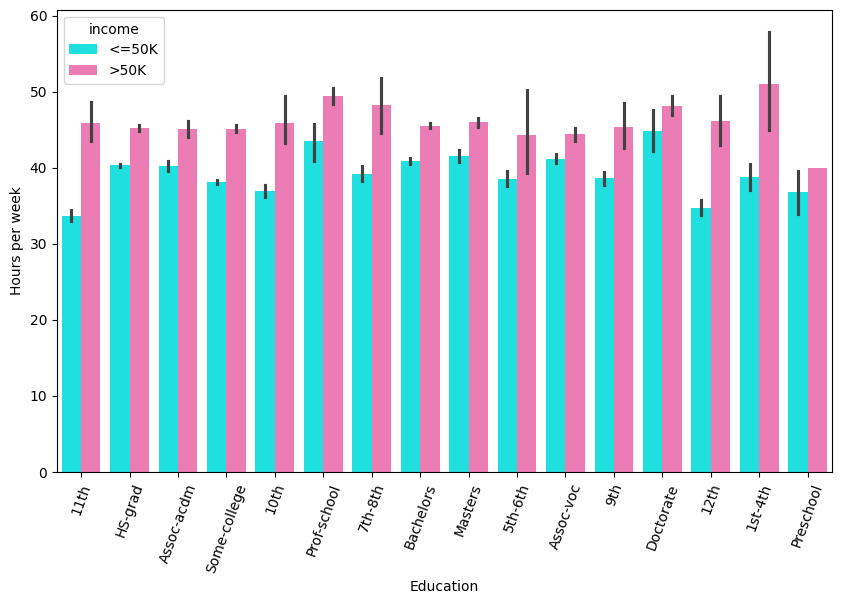

In [48]:
# plotting a figure of education against the hours per week based on the income.

# Define a custom color palette
color_palette = {"<=50K": "cyan", ">50K": "hotpink"}
plt.figure(figsize=(10,6))
sns.barplot(x="education", y="hours.per.week", data=df, hue="income", palette=color_palette)
plt.xlabel("Education")
plt.ylabel("Hours per week")
plt.xticks(rotation=70)

C:\Users\arkha\AppData\Local\Temp\ipykernel_15884\3115508808.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="marital.status", y="capital.gain", data=df, palette=custom_colors)


([0, 1, 2, 3, 4, 5, 6],
 [Text(0, 0, 'Never-married'),
  Text(1, 0, 'Married-civ-spouse'),
  Text(2, 0, 'Widowed'),
  Text(3, 0, 'Separated'),
  Text(4, 0, 'Divorced'),
  Text(5, 0, 'Married-spouse-absent'),
  Text(6, 0, 'Married-AF-spouse')])

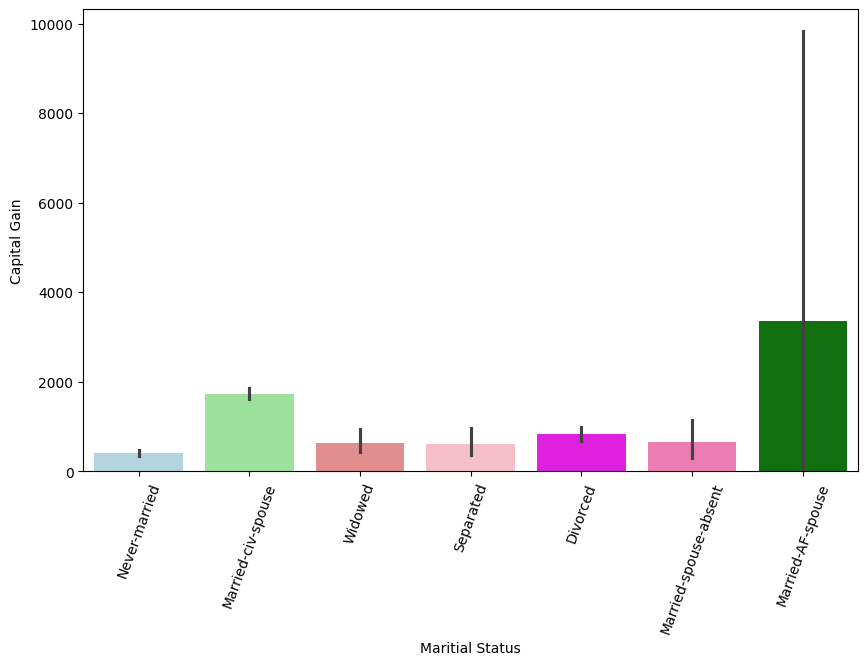

In [64]:
# plotting a figure of maritial status against income.

# Define custom colors for the pie chart slices
custom_colors = ['lightblue', 'lightgreen', 'lightcoral', 'lightpink', 'magenta', "hotpink", "green"]
plt.figure(figsize=(10,6))
sns.barplot(x="marital.status", y="capital.gain", data=df, palette=custom_colors)
plt.xlabel("Maritial Status")
plt.ylabel("Capital Gain")
plt.xticks(rotation=70)

This provides an overall summary on our dataset. We can note the below points regarding the dataset.

* The dataset had 3,621 null values in the form "?" in the "native.country" and "occupation" columns which were dropped. 

* There is an imbalance in the dataset where more than 75% of the outcome is <=50K.

* A few more bar plots were plotted expecting additional information regarding the dataset and possible relationships between features.